#*Practical No.4 - Data Visualization*

Q IMPLEMENTS DATA VISUALIZATION AND EXPLORATION USING MATPLOTLIB LIBRARY

Dataset Link :- https://github.com/Erdos1729
/food-demand-forecasting/tree/master/datasets


In [ ]:
#import the relevant libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [ ]:
#Loading datasets

df_meal = pd.read_csv('/content/meal_info.csv')
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
df_center = pd.read_csv('/content/fulfilment_centre_info.csv')
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
df_food = pd.read_csv('/content/train_file.csv')
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
#merge all the three dataframes into a single dataframe

df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

In [ ]:
#Bar Graph using matplotlib

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,29973189
Biryani,449939
Desert,1310098
Extras,2973858
Fish,350150
Other Snacks,3460470
Pasta,1206516
Pizza,5047596
Rice Bowl,15300443


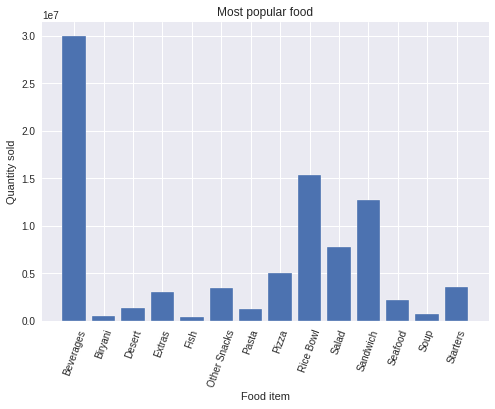

In [ ]:
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 

#display plot 
plt.show()

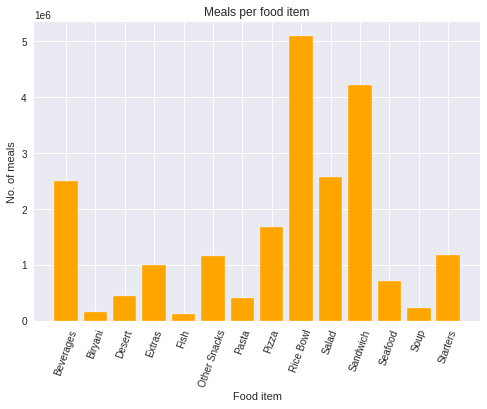

In [ ]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')

#display plot
plt.show();

In [ ]:
#Pie Chart using matplotlib

#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):
  #cuisine
  c = df['cuisine'].unique()[i]
  #num of orders for the cuisine
  c_order = df[df['cuisine']==c]['num_orders'].sum()
  d_cuisine[c] = c_order/total

print(d_cuisine)

{'Thai': 0.28139228829219187, 'Indian': 0.21622393788133448, 'Italian': 0.36429709418000517, 'Continental': 0.13808667964646845}


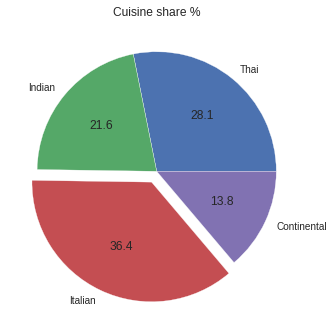

In [ ]:
#pie plot
autopcts='%0.1f'
explodes=[0,0,0.1,0]
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct= autopcts,explode = explodes) 

#label the plot 
plt.title('Cuisine share %') 
 
plt.show();

In [ ]:
#Box Plot using matplotlib

#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


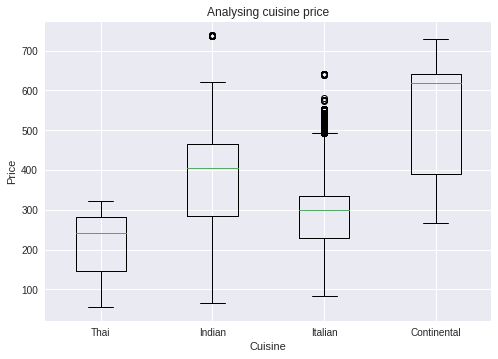

In [ ]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#display 
plt.show();

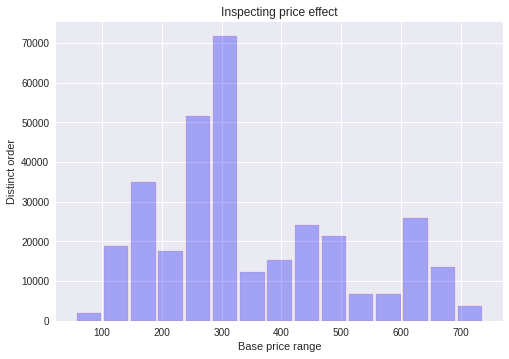

In [ ]:
#Histogram using matplotlib

#plotting histogram 
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 

#plot title 
plt.title('Inspecting price effect') 

#display the plot 

plt.show();

In [ ]:
#Line Plot and Subplots using matplotlib

#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

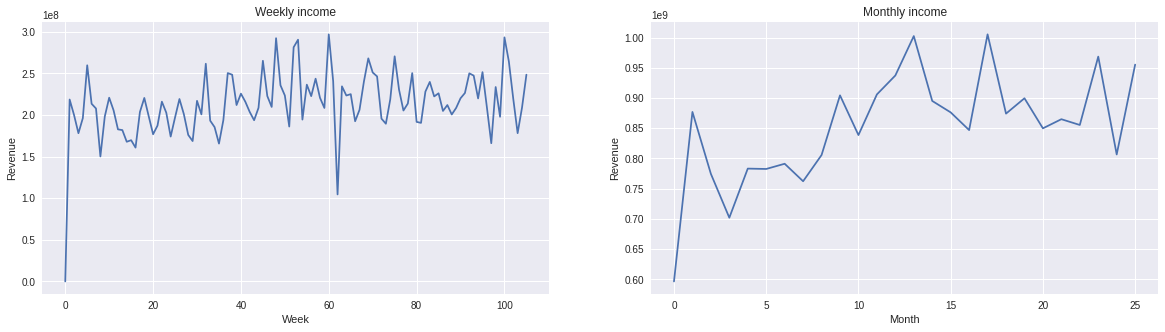

In [ ]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

#display the plot  
plt.show();

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


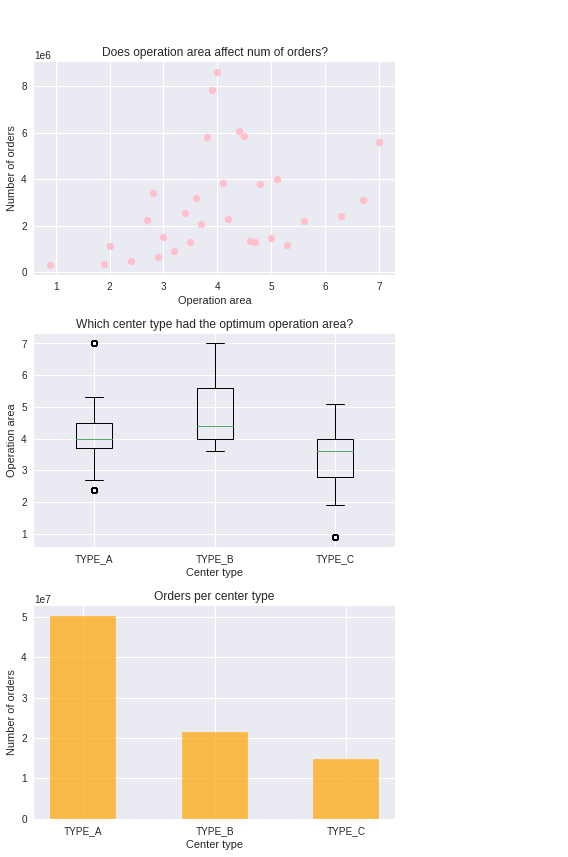

In [ ]:
# Scatter Plot using matplotlib

center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

#relation between op area and number of orders 
op_table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum) 

#relation between center type and op area 
c_type = {} 
for i in center_type_name: 
    c_type[i] = df[df['center_type']==i].op_area 

#relation between center type and num of orders 
center_table=pd.pivot_table(df,index='center_type',values='num_orders',aggfunc=np.sum) 

#subplots 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

#scatter plots 
ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

#boxplot 
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

#bar graph 
ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

#show figure 
plt.tight_layout() 
plt.show();